# Example of optimizing a convex function

# Goal is to test the objective values found by Mango
- Search space size: Uniform
- Number of iterations to try: 40
- domain size: 5000 
- Initial Random: 5

# Benchmarking test with different iterations for serial executions

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform

def get_param_dict():
    param_dict = {
        'x': uniform(-5000, 10000)
    }
    return param_dict
    
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        result = -(x**2)
        results.append(result)
    return results

def get_conf():
    conf = dict()
    conf['batch_size'] = 1
    conf['initial_random'] = 5
    conf['num_iteration'] = 200
    conf['domain_size'] = 5000
    return conf

def get_optimal_x():
    param_dict = get_param_dict()
    conf = get_conf()
    tuner = Tuner(param_dict, objfunc,conf)
    results = tuner.maximize()
    return results

In [2]:
Store_Optimal_X = []
Store_Results = []
num_of_tries = 100

In [3]:
for i in range(num_of_tries):
    results = get_optimal_x()
    Store_Results.append(results)
    print(i,":",results['best_params']['x'])

0 : -0.006211593042280583
1 : 0.002115129529556725
2 : -0.0004331693316999008
3 : 0.004483803710172651
4 : -0.0036763401913049165
5 : -0.002504850168406847
6 : 0.000593974156799959
7 : -0.025974496391427238
8 : -0.0035801062595055555
9 : -0.010270709524775157
10 : 0.005791434397906414
11 : -0.004157694061177608
12 : -0.0020071081062269513
13 : 0.005321287096194283
14 : 0.006114047304436099
15 : 0.008423818036135344
16 : 0.013873038044948771
17 : 0.006817004133154114
18 : -0.0007546432470917352
19 : -0.008884660102012276
20 : -0.009005714215163607
21 : -0.008929249455832178
22 : 0.00626447472768632
23 : 0.011973804336776084
24 : 0.007849428436202288
25 : -0.001780328470886161
26 : -0.005917449135267816
27 : -0.0029617038198921364
28 : 0.0021287530416884692
29 : -0.0038366860844689654
30 : -0.01663314591951348
31 : 0.00308116531050473
32 : 0.0020109779006816098
33 : -0.011581572981413046
34 : -0.006234970850528043
35 : 0.00902570409107284
36 : -0.004744474109429575
37 : 0.003013277544596

In [88]:
#len(Store_Results[0]['objective_values'])

In [89]:
#Store_Results[0]['objective_values'][:15]

In [90]:
#len(Store_Results[0]['params_tried'])

# Extract from the results returned the true optimal values for each iteration

In [22]:
import numpy as np

total_experiments = 100

initial_random = 5

plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

plotting_list = []

for exp in range(total_experiments): #for all exp
    local_list = []
    for itr in plotting_itr: # for all points to plot
        # find the value of optimal parameters in itr+ initial_random
        max_value = np.array(Store_Results[exp]['objective_values'][:itr+initial_random]).max()
        local_list.append(max_value)
    plotting_list.append(local_list)

In [23]:
plotting_array = np.array(plotting_list)

In [24]:
plotting_array.shape

(100, 10)

In [25]:
#plotting_array

In [26]:
Y = []
#count range between -1 and 1 and show it
for i in range(len(plotting_itr)):
    y_value = np.count_nonzero((plotting_array[:,i] > -1))/plotting_array[:,i].size
    Y.append(y_value*100)

In [27]:
Y

[25.0, 63.0, 86.0, 99.0, 99.0, 100.0, 100.0, 100.0, 100.0, 100.0]

In [32]:
Y_serial = [25.0, 63.0, 86.0, 99.0, 99.0, 100.0, 100.0, 100.0, 100.0, 100.0]

In [33]:
Y_batch = [68.18181818181817,
 90.9090909090909,
 95.45454545454545,
 96.96969696969697,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [34]:
plotting_itr =[10, 20,30,40,50,60,70,80,90,100]

In [35]:
#np.count_nonzero((plotting_array[:,0] > -1) & (plotting_array[:,0] < 1))/plotting_array[:,0].size

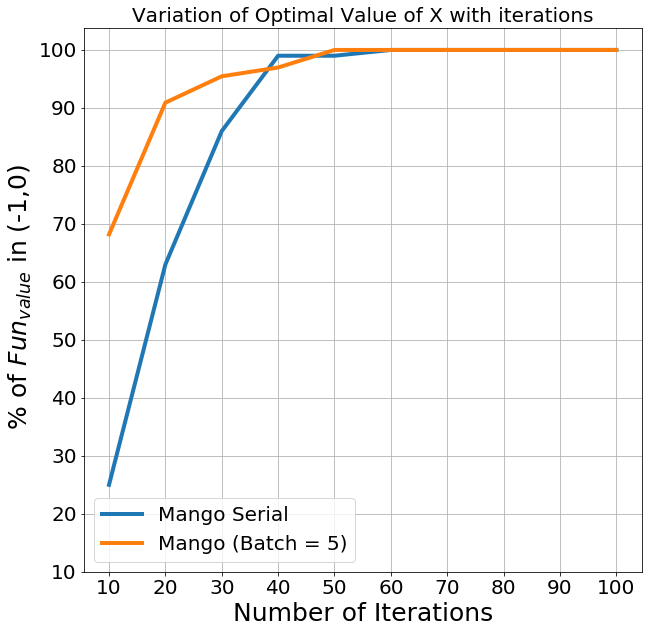

In [39]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


plt.plot(plotting_itr,Y_serial,label = 'Mango Serial',linewidth=4.0) #x, y
plt.plot(plotting_itr,Y_batch,label = 'Mango (Batch = 5)',linewidth=4.0) #x, y


plt.xlabel('Number of Iterations',fontsize=25)
plt.ylabel(' % of $Fun_{value}$ in (-1,0)',fontsize=25)
plt.title('Variation of Optimal Value of X with iterations',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yticks(np.arange(10, 110, step=10))
plt.xticks(np.arange(10, 110, step=10))
plt.grid(True)
plt.legend(fontsize=20)
plt.show()